Исследование математической модели, Панкратов Александр, МТ-402

In [2]:
from IPython.display import display
from ipywidgets import *
from IPython.display import Image
from matplotlib import pyplot as plt
import math
import random

In [3]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [4]:
p = 10
Step = 0.001
q = 1

In [5]:
def f(x,y):
    return 1-x*y

In [6]:
def g(x,y):
    return p*y*(x-(1+q)/(q+y))

In [7]:
def k1(x0,y0):
    return Step*f(x0,y0)

In [8]:
def l1(x0,y0):
    return Step*g(x0,y0)

In [9]:
def k2(x0,y0):
    x = x0+k1(x0,y0)/2
    y = y0+l1(x0,y0)/2 
    return Step*f(x,y)

In [10]:
def l2(x0,y0):
    x = x0+k1(x0,y0)/2
    y = y0+l1(x0,y0)/2
    return Step*g(x,y)

In [11]:
def k3(x0,y0):
    x = x0+k2(x0,y0)/2
    y = y0+l2(x0,y0)/2
    return Step*f(x,y)

In [12]:
def l3(x0,y0):
    x = x0+k2(x0,y0)/2
    y = y0+l2(x0,y0)/2
    return Step*g(x,y)

In [13]:
def k4(x0,y0):
    x = x0+k3(x0,y0)
    y = y0+l3(x0,y0)
    return Step*f(x,y)

In [14]:
def l4(x0,y0):
    x = x0+k3(x0,y0)
    y = y0+l3(x0,y0)
    return Step*g(x,y)

In [15]:
def rk(pair):
    x0 = float(pair[0])
    y0 = float(pair[1])
    x = pair[0] +1/6*(k1(x0,y0)+2*k2(x0,y0)+2*k3(x0,y0)+k4(x0,y0))
    y = pair[1] +1/6*(l1(x0,y0)+2*l2(x0,y0)+2*l3(x0,y0)+l4(x0,y0))
    return [x,y]

In [16]:
def curve(x0,y0,n):
    i = 0
    res_x = list()
    res_y = list()
    while i < n:
        res_x.append(x0)
        res_y.append(y0)
        current = rk([x0,y0])
        x0 = current[0]
        y0 = current[1]
        i+=1
    return[res_x,res_y]

In [17]:
def curves_y(start_y,end_y,x,step,rk_iter,color='c',lw=1):
    y = start_y
    while y < end_y:
        current_curve = curve(x,y,rk_iter)
        plt.plot(current_curve[0],current_curve[1],color,linewidth=lw)
        y+=step

In [17]:
def curves_x(start_x,end_x,y,step,rk_iter):
    x = start_x
    while x < end_x:
        current_curve = curve(x,y,rk_iter)
        plt.plot(current_curve[0],current_curve[1],'c',linewidth=5)
        x+=step

In [18]:
#plot settings
singular_point_x = 1
singular_point_y = 1
left_bound = singular_point_x-1.5
right_bound = singular_point_x+2.5
top_bound = singular_point_y-1
bottom_bound = singular_point_x+3
#
#plt.xlim(left_bound, right_bound)
#plt.ylim(bottom_bound,top_bound)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=10
#

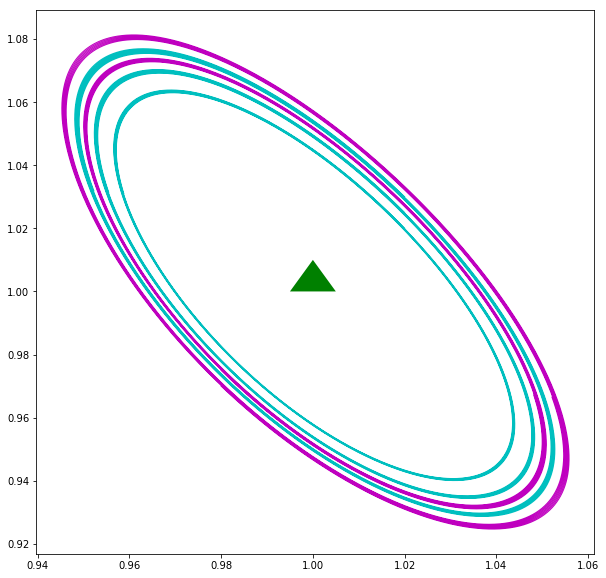

In [19]:
#Это рисовать портреты
buf = p
p = 2
Step = 0.001
curves_y(0.97, 0.98, 0.98, 0.005, 40000,color='m')
curves_y(1.02, 1.03, 1.02, 0.005, 40000)

ax = plt.axes()
plt.axes().arrow(singular_point_x,singular_point_y,0,0.00000001,head_width=0.01, head_length=0.01,lw = 0,color='g')
p = buf
plt.show()

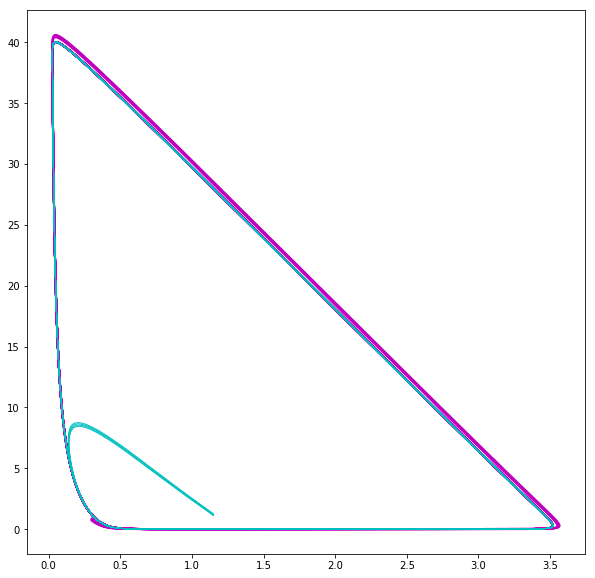

In [20]:
#Это рисовать портреты
buf = p
p = 12

Step = 0.001
curves_y(0.7, 0.9, 0.3, 0.05, 40000,color='m', lw=2)
curves_y(1.1, 1.3, 1.15, 0.05, 40000)

ax = plt.axes()
plt.axes().arrow(singular_point_x,singular_point_y,0,0.00000001,head_width=0.01, head_length=0.01,lw = 0,color='g')
p = buf
plt.show()

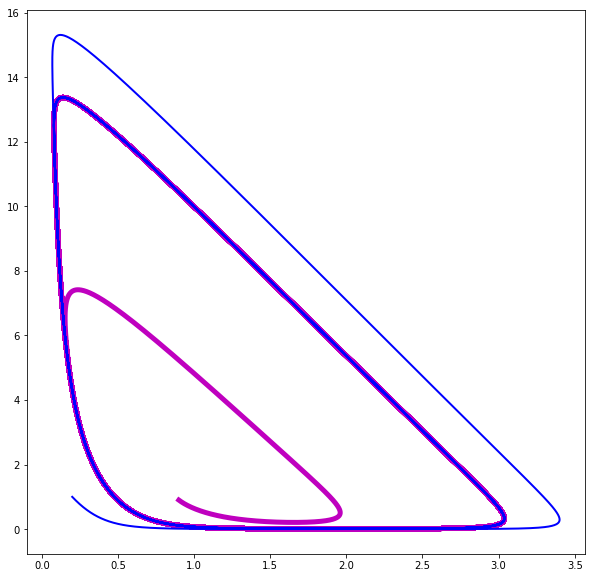

In [48]:
#Ищу цикл в первом неустойчивом портрете
buf = p
Step = 0.001
p = 5
crv = curve(0.9,0.9,1000000)
plt.plot(crv[0],crv[1],'m',linewidth=5)
crv = curve(0.2,1,100000)
plt.plot(crv[0],crv[1],color='b',linewidth=2)
p = buf
plt.show()

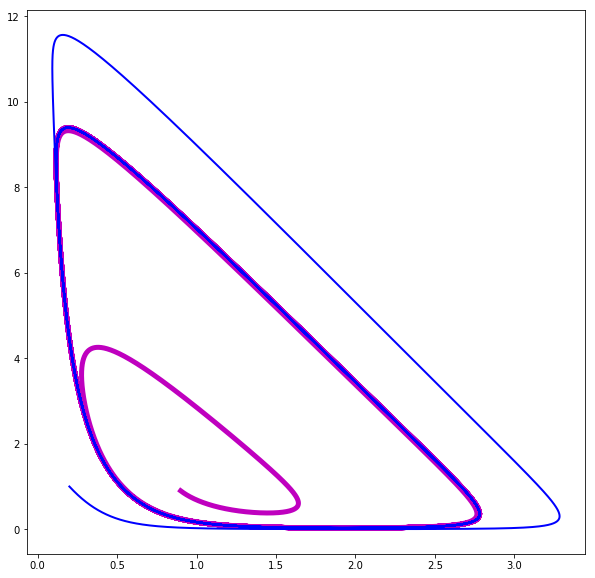

In [110]:
#Ищу цикл в первом неустойчивом портрете
buf = p
Step = 0.001
p = 4
crv = curve(0.9,0.9,100000)
plt.plot(crv[0],crv[1],'m',linewidth=5)
crv = curve(0.2,1,100000)
plt.plot(crv[0],crv[1],color='b',linewidth=2)
p = buf
plt.show()

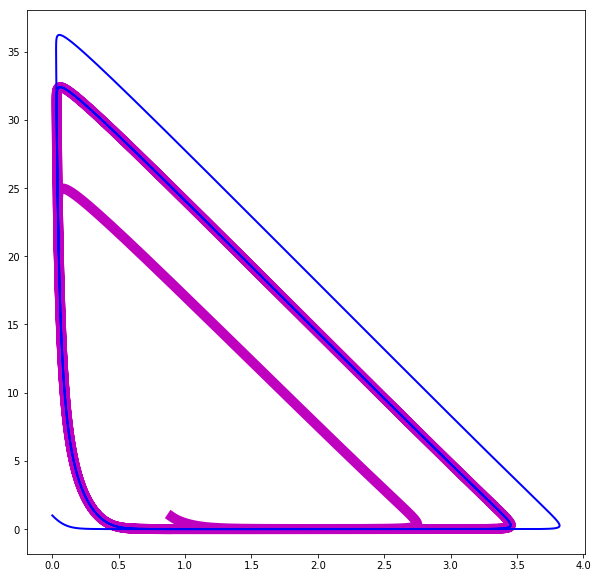

In [18]:
#Ищу цикл во втором неустойчивом портрете
buf = p
p = 10
crv = curve(0.9,0.9,20000)
plt.plot(crv[0],crv[1],'m',linewidth=10)
crv = curve(0.0,1,20000)
plt.plot(crv[0],crv[1],color='b',linewidth=2)
p = buf
plt.show()

In [19]:
def Andronov_Hopf_condition(m):
    vals = eugenvalues(m)
    print(vals)
    condition = (abs(vals[0]-1)<0.01 and abs(vals[1])<1)or(abs(vals[1]-1)<0.01 and abs(vals[0])<1) 
    return [condition, vals]

In [20]:
def euclidean_range(x0,y0,x1,y1):
    return math.sqrt(math.pow(x0-x1,2)+math.pow(y0-y1,2))

def find_cycle(eps):
    result_x = list()
    result_y = list()
    line_x = singular_point_x+0.001 
    x_0 = singular_point_x+0.001
    y_0 = singular_point_y+0.001
    temp_rk = rk([x_0,y_0])
    x_1 = temp_rk[0]
    y_1 = temp_rk[1]
    result_x.append(x_0)
    result_x.append(x_1)
    result_y.append(y_0)
    result_y.append(y_1)
    cross = [x_0,y_0]
    is_cycle_find = False
    while not is_cycle_find:
        buf_x = x_1
        buf_y = y_1
        temp_rk = rk([x_0,y_0])
        x_1 = temp_rk[0]
        y_1 = temp_rk[1]
        x_0 = buf_x
        y_0 = buf_y
        result_x.append(x_1)
        result_y.append(y_1)
        if (((x_0 <= line_x and x_1 >= line_x)or
            (x_0 >= line_x and x_1 <= line_x))and
            (y_1 >= singular_point_y)):
            #print(range(x_1y_1,cross[0],cross[1])
            if(y_0<=y_1):
                y0=y_0
                y1=y_1
                x0 = x_0
                x1 = x_1
            else:
                y0=y_1
                y1 = y_0
                x0 = x_1
                x1 = x_0
            current_cross = y0+(y1-y0)*abs(singular_point_x-x0)/abs(x1-x0)
            if abs(current_cross - cross[1]) < eps:
                print("distance: "+str(abs(current_cross - cross[1])))
                is_cycle_find = True
            else:
                print("distance: "+str(abs(current_cross - cross[1])))
                cross[1] = current_cross
                result_x = list()
                result_y = list()
                result_x.append(x_1)
                result_y.append(y_1)
    return [result_x,result_y]

def get_F_matrix(point):
    dfdx = -point[1]
    dfdy = -point[0]
    dgdx = p*point[1]
    dgdy = p*point[0]-2*p/math.pow((1+point[1]),2)
    return[[dfdx,dfdy],[dgdx,dgdy]]

def Euler_iter(point, matrix):
    inter_x = point[0] + Step*(matrix[0][0]*point[0]+matrix[0][1]*point[1])
    inter_y = point[1] + Step*(matrix[1][0]*point[0]+matrix[1][1]*point[1])
    
    #new_x = point[0] + step*(((matrix[0][0]*point[0]+matrix[0][1]*point[1])
    #                         +(matrix[0][0]*inter_x+matrix[0][1]*inter_y))/2)
    
    #new_y = point[1] + step*(((matrix[1][0]*point[0]+matrix[1][1]*point[1])
     #                        +(matrix[1][0]*inter_x+matrix[1][1]*inter_y))/2)
    #return[new_x,new_y]
    return[inter_x,inter_y]

def Euler(point, cycle):
    point_0 = point
    point_1 = Euler_iter(point,get_F_matrix([cycle[0][0],cycle[1][0]]))
    print("sas")
    for i in range(1, len(cycle[0])-1):
        point_0 = point_1
        point_1 = Euler_iter(point_1,get_F_matrix([cycle[0][i],cycle[1][i]]))
    return point_1

import cmath
def eugenvalues(M):
    #print(M)
    disc_sqrt = cmath.sqrt(math.pow(M[0][0]+M[1][1],2)-4*(M[0][0]*M[1][1]-M[1][0]*M[0][1]))
    if(disc_sqrt.imag > 0):
        print("img = "+str(disc_sqrt.imag))
    disc_sqrt = disc_sqrt.real
    return[(M[0][0]+M[1][1]+disc_sqrt)/2, (M[0][0]+M[1][1]-disc_sqrt)/2]

def is_stable(cycle):
    a_b = Euler([1,0],cycle)
    c_d = Euler([0,1],cycle)
    return Andronov_Hopf_condition([[a_b[0],a_b[1]],[c_d[0],c_d[1]]])#([[a_b[0],c_d[0]],[a_b[1],c_d[1]]])

distance: 0.008308829234547677
distance: 0.021689222743269232
distance: 0.0756737220821937
distance: 0.2848599704876551
distance: 1.0153115107401811
distance: 1.134354094877275
distance: 0.11382941776604882
distance: 0.0018712093812531805
distance: 2.6664307556600875e-05
0.05
distance: 0.0249676700646404
distance: 0.19811231025105158
distance: 2.102016112265046
distance: 2.7791609279335723
distance: 0.021128817366128594
distance: 8.17593534208072e-07
0.05
distance: 0.06701111217005695
distance: 1.6870649707767444
distance: 5.7077699994573345
distance: 0.07974502828457197
distance: 2.6149351661786113e-07
0.05
distance: 0.17938661061969863
distance: 6.775151389030252
distance: 2.9075596572746267
distance: 1.2529990058851581e-06
0.05
distance: 0.5315264754638915
distance: 10.73459380216434
distance: 0.8673137099152104
distance: 2.8750046432435283e-07
0.05


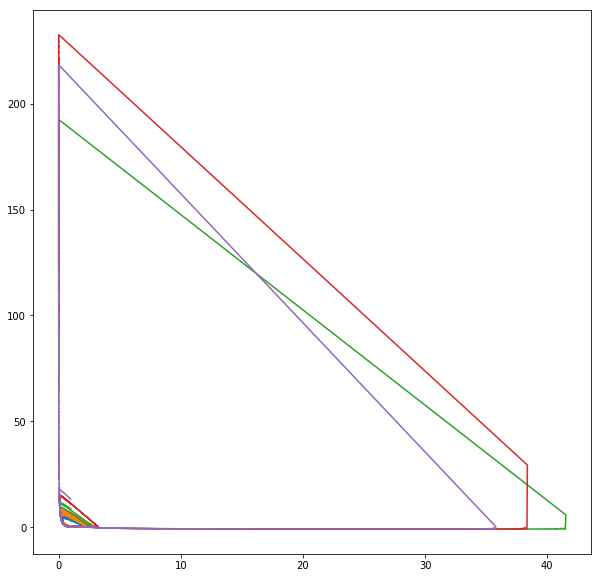

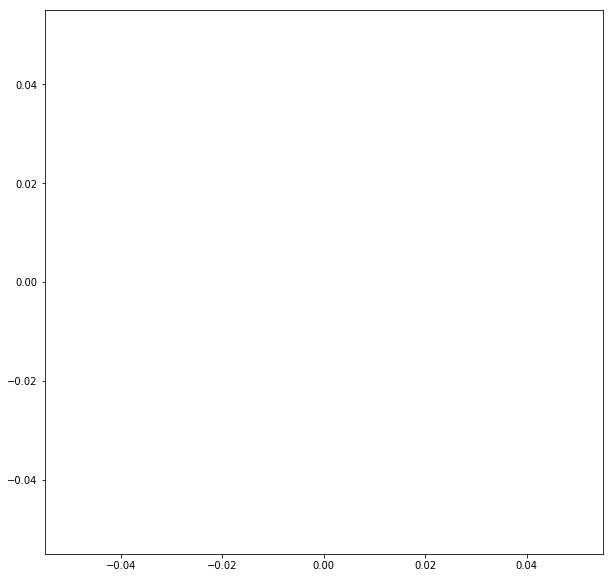

In [63]:
#2.8046875
#Второй цикл(неустойчивый фокус, 2 > p < 6+4*sqrt(2); 11.65..11.66)
step_buf = Step
p_buf = p
Step = 0.001
p_vals = list()
noise_lvl = 0.05
lambda2_vals = list();
for i in range(0,5):
    p = 2.904+0.8*i
    cycle = find_cycle(0.001)
    crv = noisy_curve(cycle[0][0],cycle[1][0],50000)
    plt.plot(crv[0],crv[1])
Step = step_buf
plt.show()

In [21]:
import random
import math
random.seed()
def normal_dist_random_values():
    x = random.random()
    y = random.random()
    
    a = math.sqrt(-2*math.log(x))*math.cos(2*math.pi*y)
    b = math.sqrt(-2*math.log(x))*math.sin(2*math.pi*y)
    return [a,b]

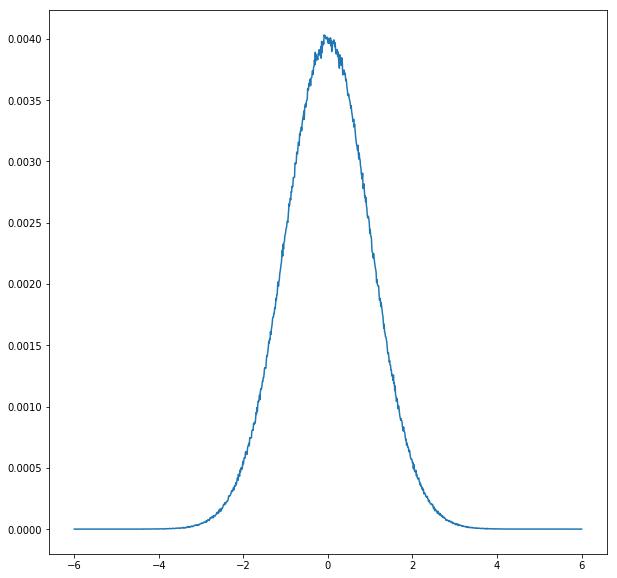

In [30]:
from collections import OrderedDict
values = list()
curve = {a/100 : 0 for a in range(-600,601)}
curve = OrderedDict(sorted(curve.items(), key=lambda t: t[0]))
for i in range(1,2000000):
    current = normal_dist_random_values()
    values.append(current[0])
    values.append(current[1])
for value in values:
    a = round(value,2)
    if(abs(a)<=6):
        curve[a]= curve[a]+1
Y = list(map(lambda x: x[1]/4000000,list(curve.items())))
X = list(curve.keys())
plt.plot(X,Y)
plt.show()

In [22]:
noise_lvl = 0.01

def noisy_curve(x0,y0,n):
    i = 0
    res_x = list()
    res_y = list()
    print(noise_lvl)
    while i < n:
        res_x.append(x0)
        res_y.append(y0)
        current = rk([x0,y0])
        noise = normal_dist_random_values()
        x0 = current[0]+noise_lvl*noise[0]*math.sqrt(Step)
        y0 = current[1]+noise_lvl*noise[1]*math.sqrt(Step)
        i+=1
    return[res_x,res_y]

def avg(list_arg):
    return sum(list_arg)/len(list_arg)

def expectancy(crv):
    return [avg(crv[0]),avg(crv[1])]

from functools import reduce
def dispersion(crv):
    exp = expectancy(crv)
    centr_curve = [map(lambda x: x-exp[0],crv[0]), map(lambda x: x-exp[1],crv[1])]
    return [reduce(lambda y,x: x*x+y,centr_curve[0])/len(crv[0]),reduce(lambda y,x: x*x+y,centr_curve[1])/len(crv[0])]

0.002
Singular point is: [1, 1].
Expectance is [1.0001148461363658, 0.9999330458069817]
Disperison is [1.0736468199125552e-05, 1.228532068135857e-05]


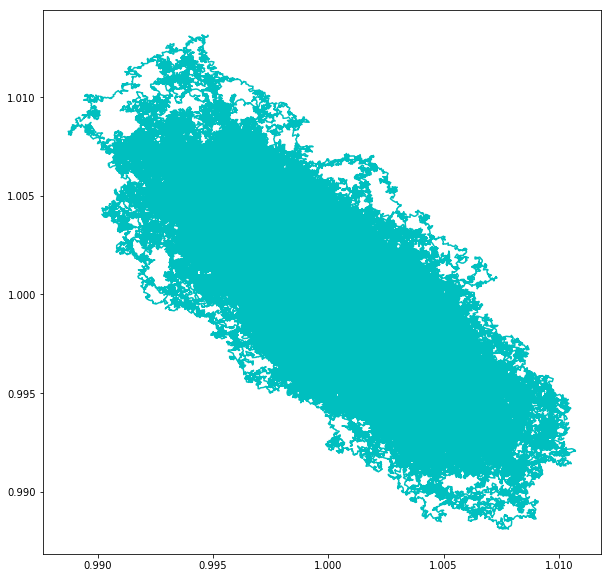

In [23]:
#Шум
step_buf = Step
p_buf = p
q_buf = q
p=0.5
q = 1
Step = 0.001
noise_lvl = 0.002
crv = noisy_curve(singular_point_x+0.001,singular_point_y+0.001,1000000)
plt.plot(crv[0],crv[1],c='c')
print("Singular point is: ["+str(singular_point_x)+", "+str(singular_point_y)+"].")
print("Expectance is "+str(expectancy(crv)))
print("Disperison is "+str(dispersion(crv)))
plt.show()
plt.plot()
p = p_buf
q=q_buf
Step = step_buf


Singular point is: [1, 1].
Expectance is [1.0008665389419307, 0.9994724156859286]
Disperison is [0.00035186773024053087, 0.0004972807435799437]


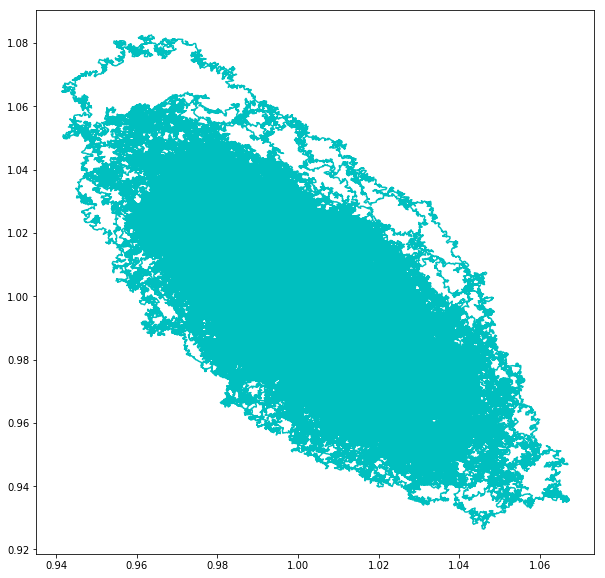

In [46]:
#Шум
step_buf = Step
p_buf = p
p=1
Step = 0.001
noise_lvl = 0.01
crv = noisy_curve(singular_point_x+0.001,singular_point_y+0.001,1000000)
plt.plot(crv[0],crv[1],c='c')
print("Singular point is: ["+str(singular_point_x)+", "+str(singular_point_y)+"].")
print("Expectance is "+str(expectancy(crv)))
print("Disperison is "+str(dispersion(crv)))
plt.show()
p = p_buf
Step = step_buf


Singular point is: [1, 1].
Expectance is [1.0104604292192645, 0.9909294771087852]
Disperison is [0.0011963762102629924, 0.0011820417014676617]
Singular point is: [1, 1].
Expectance is [0.9873044953886209, 1.0151865138104919]
Disperison is [0.0029117622757153347, 0.00291412789530336]
Singular point is: [1, 1].
Expectance is [1.0058501771542032, 1.001740007561755]
Disperison is [0.006148907222848094, 0.006163784175293142]
Singular point is: [1, 1].
Expectance is [1.0180264714839231, 0.9912535574818603]
Disperison is [0.009810277719162005, 0.00962236371014781]
Singular point is: [1, 1].
Expectance is [1.0241838277916095, 0.9927233725782771]
Disperison is [0.018928538171384433, 0.016043524020683847]
Singular point is: [1, 1].
Expectance is [1.0203607082915158, 1.001603563866504]
Disperison is [0.027034944668877153, 0.021289913086476746]
Singular point is: [1, 1].
Expectance is [0.9758778277850131, 1.0501830288615246]
Disperison is [0.029526506917233176, 0.030114227002440326]
Singular point

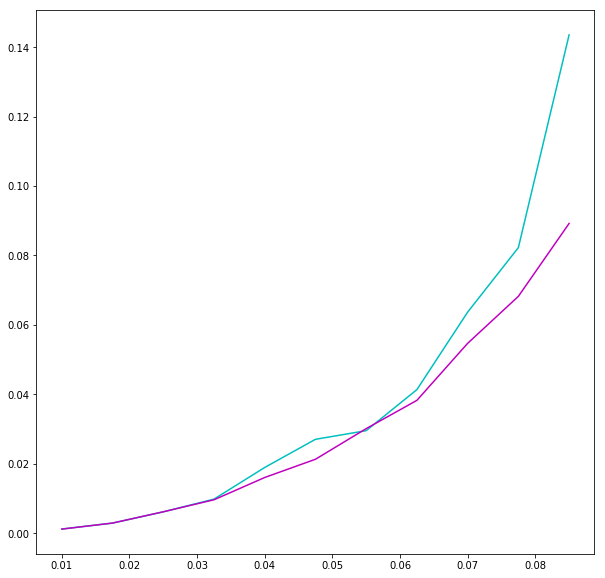

In [47]:
#Шум
step_buf = Step
p_buf = p
p=0.1
Step = 0.001
noise_lvl = 0.01
dis_X = list()
dis_Y = list()
parameter = list()
for i in range(0,12):
    noise_lvl = 0.01+i*0.0075
    crv = noisy_curve(singular_point_x+0.001,singular_point_y+0.001,1000000)
    disp = dispersion(crv)
    dis_X.append(disp[0])
    dis_Y.append(disp[1])
    parameter.append(noise_lvl)
    print("Singular point is: ["+str(singular_point_x)+", "+str(singular_point_y)+"].")
    print("Expectance is "+str(expectancy(crv)))
    print("Disperison is "+str(disp))
plt.plot(parameter,dis_X,c='c')
plt.plot(parameter,dis_Y,c='m')
plt.show()
p = p_buf
Step = step_buf


In [1]:
#по параметру
step_buf = Step
p_buf = p
q=0.1
Step = 0.001
noise_lvl = 0.05
disX = list()
disY = list()
p=0.1
parameter = list()
for i in range(0,10):
    print(p)
    crv = noisy_curve(singular_point_x+0.001,singular_point_y+0.001,1000000)
    disp = dispersion(crv)
    disX.append(disp[0])
    disY.append(disp[1])
    parameter.append(p)
    p+= 0.1
plt.plot(parameter,disX,'m')
plt.plot(parameter,disY)
plt.show()
p = p_buf
Step = step_buf

NameError: name 'Step' is not defined

0.01
Singular point is: [1, 1].
Expectance is [0.9962198561906955, 1.0045994649540766]
Disperison is [0.0010180576287877623, 0.0010561357800803071]
0.0175
Singular point is: [1, 1].
Expectance is [0.9962944281874212, 1.0068693485104871]
Disperison is [0.0027252216571878795, 0.002668282611318078]
0.025
Singular point is: [1, 1].
Expectance is [1.002375841273168, 1.0054136419068054]
Disperison is [0.008200538183149367, 0.007733953730153784]
0.0325
Singular point is: [1, 1].
Expectance is [1.0085649729664588, 1.0034174193241652]
Disperison is [0.01380748228185163, 0.012959729230545851]
0.04
Singular point is: [1, 1].
Expectance is [1.049073723256424, 0.9701856417809427]
Disperison is [0.022355008803453463, 0.01832689474529664]
0.0475
Singular point is: [1, 1].
Expectance is [1.047971847736249, 0.974002845738426]
Disperison is [0.02494249306542449, 0.018753818997833252]
0.055
Singular point is: [1, 1].
Expectance is [0.9778753706013454, 1.0452034520983144]
Disperison is [0.0250567957190235

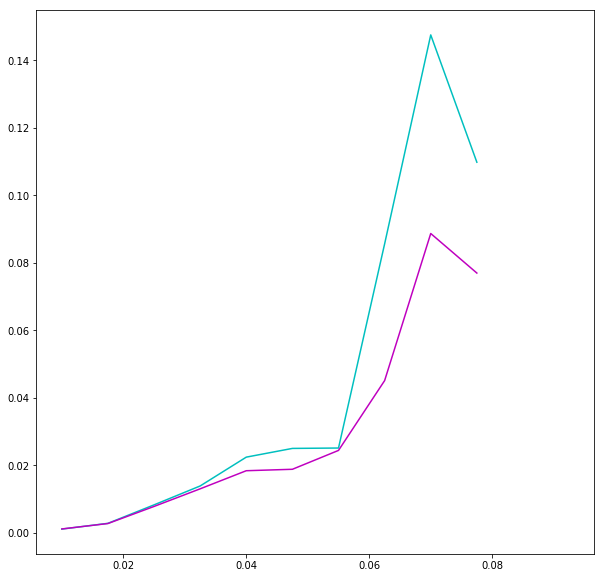

In [24]:
#Шум
step_buf = Step
p_buf = p
p=0.1
Step = 0.001
noise_lvl = 0.01
dis_X = list()
dis_Y = list()
parameter = list()
for i in range(0,12):
    noise_lvl = 0.01+i*0.0075
    crv = noisy_curve(singular_point_x+0.001,singular_point_y+0.001,1000000)
    disp = dispersion(crv)
    dis_X.append(disp[0])
    dis_Y.append(disp[1])
    parameter.append(noise_lvl)
    print("Singular point is: ["+str(singular_point_x)+", "+str(singular_point_y)+"].")
    print("Expectance is "+str(expectancy(crv)))
    print("Disperison is "+str(disp))
plt.plot(parameter,dis_X,c='c')
plt.plot(parameter,dis_Y,c='m')
plt.show()
p = p_buf
Step = step_buf
